# 1. Data Reading & Understanding

In [4]:
# Import necessary libraries
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Mount Google Drive for Colab
from google.colab import drive
drive.mount('/content/gdrive')

# Define the paths for train and test directories
train_dir = '/content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
test_dir = '/content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/'

# Print contents of the directories for understanding
print(f"Train directory classes: {os.listdir(train_dir)}")
print(f"Test directory classes: {os.listdir(test_dir)}")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Train directory classes: ['vascular lesion', 'squamous cell carcinoma', 'seborrheic keratosis', 'pigmented benign keratosis', 'nevus', 'melanoma', 'dermatofibroma', 'basal cell carcinoma', 'actinic keratosis']
Test directory classes: ['vascular lesion', 'squamous cell carcinoma', 'seborrheic keratosis', 'pigmented benign keratosis', 'nevus', 'melanoma', 'dermatofibroma', 'basal cell carcinoma', 'actinic keratosis']


# 2. Dataset Creation (Train & Validation Split)

In [5]:
# Load training data with validation split
batch_size = 32
img_size = (180, 180)  # Resize images to 180x180

train_dataset = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

validation_dataset = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size
)


Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Found 2239 files belonging to 9 classes.
Using 447 files for validation.
Found 118 files belonging to 9 classes.


# 3. Dataset Visualization

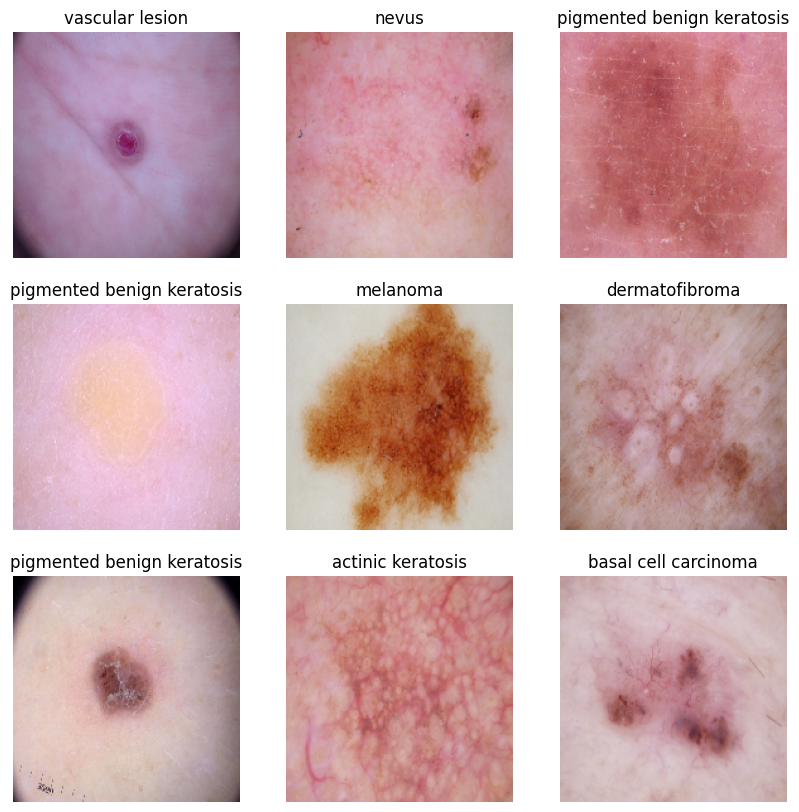

In [6]:
import matplotlib.pyplot as plt

# Display an image from each of the 9 classes
class_names = train_dataset.class_names
plt.figure(figsize=(10, 10))

for images, labels in train_dataset.take(1):
    for i in range(9):  # Since there are 9 classes
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# 4. Model Building & Training (Without Augmentation)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 709s 13s/step - accuracy: 0.2077 - loss: 2.2129 - val_accuracy: 0.2662 - val_loss: 1.9522
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 361ms/step - accuracy: 0.2844 - loss: 1.8974 - val_accuracy: 0.2908 - val_loss: 1.9299
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 338ms/step - accuracy: 0.3345 - loss: 1.8241 - val_accuracy: 0.4452 - val_loss: 1.6073
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 368ms/step - accuracy: 0.4423 - loss: 1.5618 - val_accuracy: 0.4877 - val_loss: 1.4962
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 373ms/step - accuracy: 0.4874 - loss: 1.4605 - val_accuracy: 0.4944 - val_loss: 1.4705
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 369ms/step - accuracy: 0.5074 - loss: 1.3978 - val_accuracy: 0.5347 - val_loss: 1.4422
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 394ms/step - accuracy: 0.5748 - loss: 1.2612 - val_accuracy: 0.5056 - val_loss: 1.4096
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 369ms/step - accuracy: 0.5688 - loss: 1.2173 - val_accuracy: 0.5078

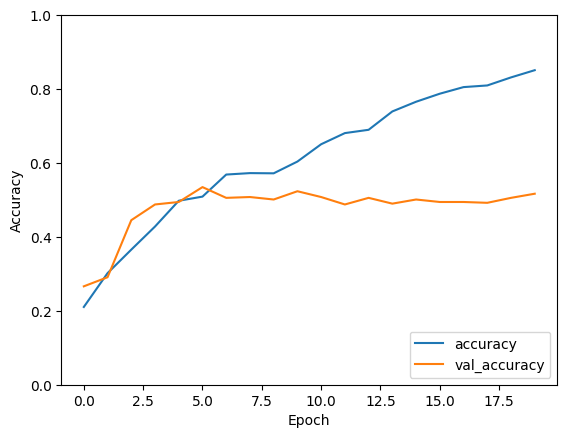

In [7]:
# Normalize pixel values between (0, 1)
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

# Create the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')  # 9 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=20)

# Plot training and validation accuracy and loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()



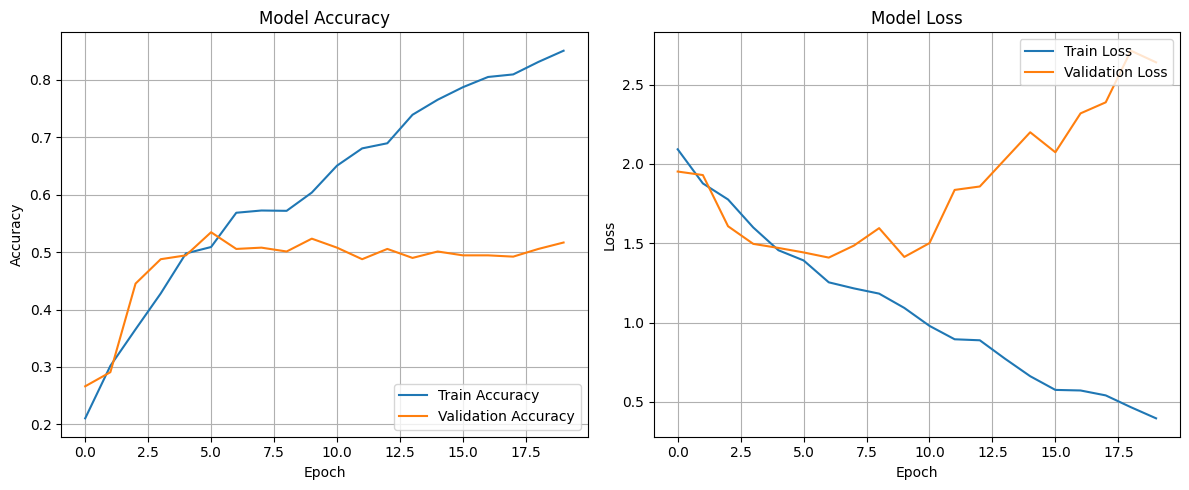

Final Training Accuracy: 0.8510
Final Validation Accuracy: 0.5168
Final Training Loss: 0.3963
Final Validation Loss: 2.6405

Interpretation: The model is overfitting.
The training accuracy is much higher than the validation accuracy, indicating overfitting.



In [8]:
# Check for overfitting or underfitting based on training and validation performance

import matplotlib.pyplot as plt

# Function to plot training and validation metrics (accuracy and loss)
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))

    # Subplot 1: Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True)

    # Subplot 2: Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(True)

    # Show the plots
    plt.tight_layout()
    plt.show()

    # Automated interpretation of overfitting, underfitting, or good fit
    interpret_model_performance(history)

# Function to interpret the training history
def interpret_model_performance(history):
    # Extract final epoch metrics
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    # Compute the differences between training and validation accuracy and loss
    acc_diff = final_train_acc - final_val_acc
    loss_diff = final_val_loss - final_train_loss

    print(f"Final Training Accuracy: {final_train_acc:.4f}")
    print(f"Final Validation Accuracy: {final_val_acc:.4f}")
    print(f"Final Training Loss: {final_train_loss:.4f}")
    print(f"Final Validation Loss: {final_val_loss:.4f}\n")

    # Interpretation based on heuristics
    if acc_diff > 0.1 and final_val_acc < 0.8:
        print("Interpretation: The model is overfitting.")
        print("The training accuracy is much higher than the validation accuracy, indicating overfitting.\n")
    elif final_train_acc < 0.7 and final_val_acc < 0.7:
        print("Interpretation: The model is underfitting.")
        print("Both the training and validation accuracy are low, indicating the model is underfitting.\n")
    elif abs(acc_diff) < 0.1 and final_val_acc > 0.8:
        print("Interpretation: The model is a good fit.")
        print("The training and validation accuracy are both high and close to each other, indicating a good fit.\n")
    else:
        print("Interpretation: The model performance is inconclusive.")
        print("The model is neither clearly overfitting nor underfitting, but may need further tuning.\n")

# Call the function after training
plot_training_history(history)


# 5. Data Augmentation Strategy to Address Overfitting/Underfitting

In [9]:
# Data augmentation layer
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
])

# Apply augmentation to the dataset
train_augmented = train_dataset.map(lambda x, y: (data_augmentation(x), y))


# 6. Model Building & Training (With Augmented Data)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 430ms/step - accuracy: 0.2169 - loss: 2.0700 - val_accuracy: 0.1924 - val_loss: 2.0456
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 442ms/step - accuracy: 0.1934 - loss: 2.0108 - val_accuracy: 0.2058 - val_loss: 2.0334
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 23s 414ms/step - accuracy: 0.1864 - loss: 2.0109 - val_accuracy: 0.2058 - val_loss: 2.0252
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 417ms/step - accuracy: 0.1810 - loss: 1.9987 - val_accuracy: 0.2058 - val_loss: 2.0329
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 24s 430ms/step - accuracy: 0.2113 - loss: 2.0043 - val_accuracy: 0.2058 - val_loss: 2.0326
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 25s 442ms/step - accuracy: 0.2039 - loss: 2.0170 - val_accuracy: 0.2058 - val_loss: 2.0322
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 24s 426ms/step - accuracy: 0.2095 - loss: 2.0117 - val_accuracy: 0.2058 - val_loss: 2.0299
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 445ms/step - accuracy: 0.1950 - loss: 2.0168 - val_accu

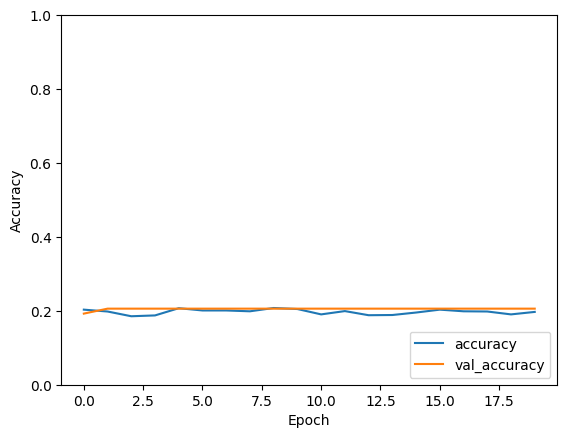

In [10]:
# Create the CNN model with augmented data
model_augmented = tf.keras.Sequential([
    data_augmentation,  # Include the augmentation layer
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

# Compile the model
model_augmented.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on augmented data
history_augmented = model_augmented.fit(train_augmented, validation_data=validation_dataset, epochs=20)

# Compare performance to the previous model
plt.plot(history_augmented.history['accuracy'], label='accuracy')
plt.plot(history_augmented.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


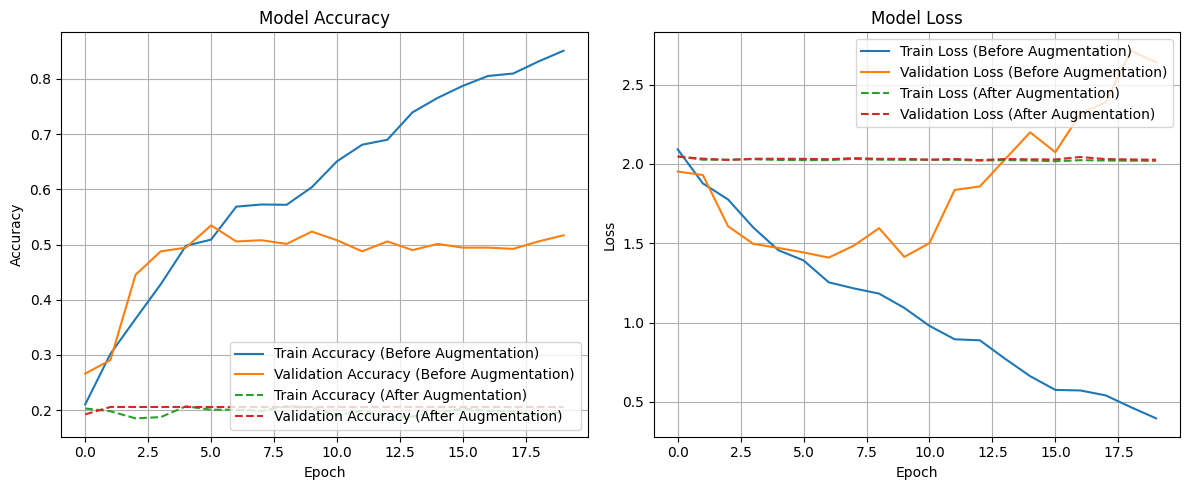

Before Augmentation:
Final Training Accuracy: 0.8510
Final Validation Accuracy: 0.5168
Final Training Loss: 0.3963
Final Validation Loss: 2.6405

After Augmentation:
Final Training Accuracy: 0.1970
Final Validation Accuracy: 0.2058
Final Training Loss: 2.0197
Final Validation Loss: 2.0266

Interpretation: The model's performance did not improve significantly after data augmentation.
Consider further tuning or applying other techniques.



In [11]:
# Write your findings after the model fit, see if the earlier issue is resolved or not?
import matplotlib.pyplot as plt

# Function to plot training and validation metrics (accuracy and loss)
def plot_training_history(history_before, history_after):
    # Plot training & validation accuracy values before and after augmentation
    plt.figure(figsize=(12, 5))

    # Subplot 1: Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history_before.history['accuracy'], label='Train Accuracy (Before Augmentation)')
    plt.plot(history_before.history['val_accuracy'], label='Validation Accuracy (Before Augmentation)')
    plt.plot(history_after.history['accuracy'], label='Train Accuracy (After Augmentation)', linestyle='--')
    plt.plot(history_after.history['val_accuracy'], label='Validation Accuracy (After Augmentation)', linestyle='--')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True)

    # Subplot 2: Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history_before.history['loss'], label='Train Loss (Before Augmentation)')
    plt.plot(history_before.history['val_loss'], label='Validation Loss (Before Augmentation)')
    plt.plot(history_after.history['loss'], label='Train Loss (After Augmentation)', linestyle='--')
    plt.plot(history_after.history['val_loss'], label='Validation Loss (After Augmentation)', linestyle='--')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(True)

    # Show the plots
    plt.tight_layout()
    plt.show()

    # Compare performance before and after augmentation
    compare_performance(history_before, history_after)

# Function to compare and interpret the model performance before and after augmentation
def compare_performance(history_before, history_after):
    # Extract final epoch metrics for both models
    final_train_acc_before = history_before.history['accuracy'][-1]
    final_val_acc_before = history_before.history['val_accuracy'][-1]
    final_train_loss_before = history_before.history['loss'][-1]
    final_val_loss_before = history_before.history['val_loss'][-1]

    final_train_acc_after = history_after.history['accuracy'][-1]
    final_val_acc_after = history_after.history['val_accuracy'][-1]
    final_train_loss_after = history_after.history['loss'][-1]
    final_val_loss_after = history_after.history['val_loss'][-1]

    # Print findings before augmentation
    print(f"Before Augmentation:")
    print(f"Final Training Accuracy: {final_train_acc_before:.4f}")
    print(f"Final Validation Accuracy: {final_val_acc_before:.4f}")
    print(f"Final Training Loss: {final_train_loss_before:.4f}")
    print(f"Final Validation Loss: {final_val_loss_before:.4f}\n")

    # Print findings after augmentation
    print(f"After Augmentation:")
    print(f"Final Training Accuracy: {final_train_acc_after:.4f}")
    print(f"Final Validation Accuracy: {final_val_acc_after:.4f}")
    print(f"Final Training Loss: {final_train_loss_after:.4f}")
    print(f"Final Validation Loss: {final_val_loss_after:.4f}\n")

    # Interpretation of improvement
    if final_val_acc_after > final_val_acc_before and final_val_loss_after < final_val_loss_before:
        print("Interpretation: The model's performance improved after data augmentation.")
        print("Validation accuracy increased and validation loss decreased, indicating the issue (overfitting/underfitting) has been resolved.\n")
    else:
        print("Interpretation: The model's performance did not improve significantly after data augmentation.")
        print("Consider further tuning or applying other techniques.\n")

# Call the function after training with and without augmentation
plot_training_history(history, history_augmented)


# 7. Class Distribution Examination

In [12]:
# Check class distribution
import numpy as np

class_counts = {}
for _, labels in train_dataset.unbatch():
    label = class_names[labels.numpy()]
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

# Print class distribution
print("Class distribution in training dataset:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

# Identify class imbalance
min_class = min(class_counts, key=class_counts.get)
max_class = max(class_counts, key=class_counts.get)
print(f"Least number of samples in: {min_class}")
print(f"Most number of samples in: {max_class}")

Class distribution in training dataset:
pigmented benign keratosis: 370
melanoma: 352
actinic keratosis: 92
basal cell carcinoma: 309
nevus: 277
dermatofibroma: 77
vascular lesion: 115
squamous cell carcinoma: 142
seborrheic keratosis: 58
Least number of samples in: seborrheic keratosis
Most number of samples in: pigmented benign keratosis


# 8. Handling Class Imbalance with Augmentor Library

In [13]:
# Install Augmentor (if not installed)
!pip install Augmentor

import Augmentor

# Perform data augmentation to balance classes using Augmentor
# Create a pipeline for each class to augment the minority classes
for class_name in class_names:
    p = Augmentor.Pipeline(f"{train_dir}/{class_name}")
    p.flip_left_right(probability=0.5)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(1000)  # Adjust this value based on your dataset imbalance


Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train//actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78D3CA6E5E10>: 100%|██████████| 1000/1000 [00:41<00:00, 24.39 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train//basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78D3CA52BE50>: 100%|██████████| 1000/1000 [00:42<00:00, 23.76 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train//dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78D3EEB2A290>: 100%|██████████| 1000/1000 [00:41<00:00, 24.11 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train//melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x78D3D836DBD0>: 100%|██████████| 1000/1000 [02:55<00:00,  5.69 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train//nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x78D43040BD00>: 100%|██████████| 1000/1000 [02:42<00:00,  6.16 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train//pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78D3CA5CBA00>: 100%|██████████| 1000/1000 [00:40<00:00, 24.49 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train//seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x78D430167B80>: 100%|██████████| 1000/1000 [01:27<00:00, 11.45 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train//squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x78D43013F9A0>: 100%|██████████| 1000/1000 [00:41<00:00, 24.20 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train//vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x78D3CA5C8250>: 100%|██████████| 1000/1000 [00:40<00:00, 24.55 Samples/s]


# 9. Model Building & Training (On Balanced Dataset)

Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 30s 445ms/step - accuracy: 0.2338 - loss: 2.0686 - val_accuracy: 0.3221 - val_loss: 1.8221
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 38s 441ms/step - accuracy: 0.3811 - loss: 1.7134 - val_accuracy: 0.4966 - val_loss: 1.4826
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 440ms/step - accuracy: 0.5018 - loss: 1.4669 - val_accuracy: 0.4944 - val_loss: 1.4788
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 25s 443ms/step - accuracy: 0.5080 - loss: 1.4044 - val_accuracy: 0.4810 - val_loss: 1.4392
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 23s 411ms/step - accuracy: 0.4957 - loss: 1.4019 - val_accuracy: 0.4855 - val_loss: 1.4344
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 25s 445ms/step - accuracy: 0.5259 - loss: 1.3293 - val_accuracy: 0.5145 - val_loss: 1.4289
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 440ms/step - accuracy: 0.5391 - loss: 1.3045 - val_accuracy: 0.5213 - val_loss: 1.3171
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 446ms/step - accuracy: 0.5500 - loss: 1.2844 - val_accu

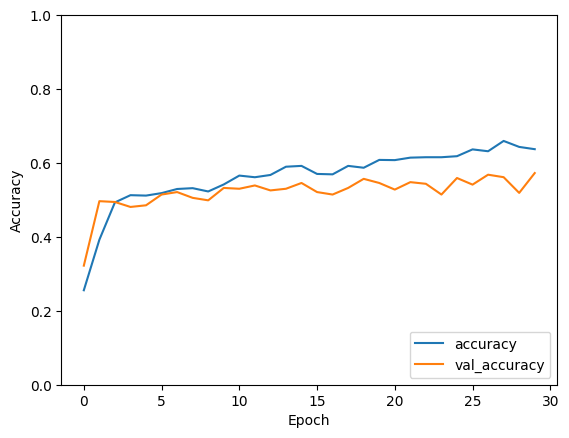

In [14]:
# Retrain the model with rectified class imbalance
# Load the new balanced dataset and train the model
model_balanced = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

# Compile the model
model_balanced.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on balanced data for 30 epochs
history_balanced = model_balanced.fit(train_augmented, validation_data=validation_dataset, epochs=30)

# Write findings to analyze improvements
plt.plot(history_balanced.history['accuracy'], label='accuracy')
plt.plot(history_balanced.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


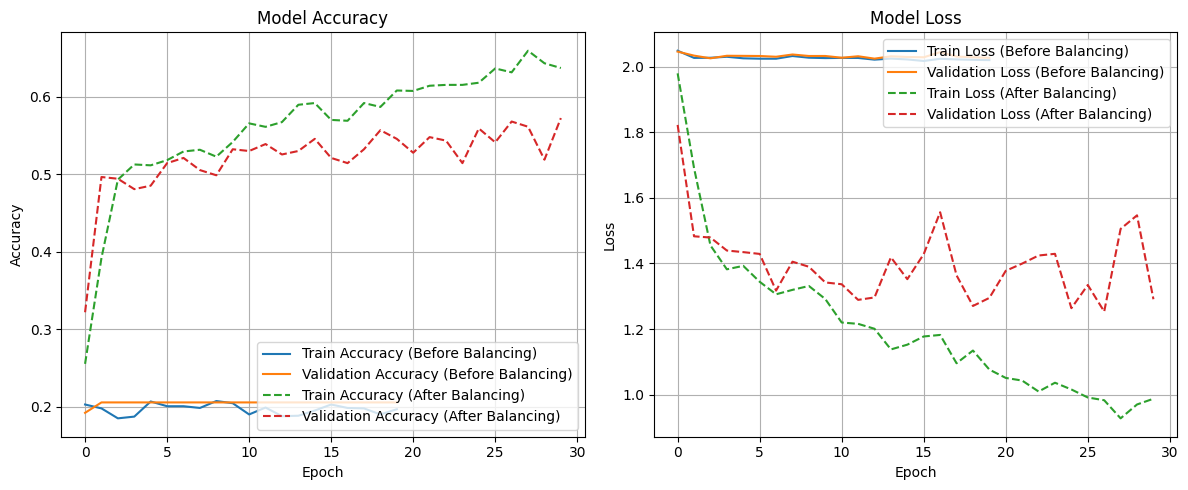

Before Class Balancing:
Final Training Accuracy: 0.1970
Final Validation Accuracy: 0.2058
Final Training Loss: 2.0197
Final Validation Loss: 2.0266

After Class Balancing:
Final Training Accuracy: 0.6373
Final Validation Accuracy: 0.5727
Final Training Loss: 0.9874
Final Validation Loss: 1.2908

Interpretation: The model's performance improved after rectifying class imbalance.
Validation accuracy increased and validation loss decreased, indicating the issue was resolved.



In [15]:
# Write your findings after the model fit, see if the issues are resolved or not?
import matplotlib.pyplot as plt

# Function to plot training and validation metrics (accuracy and loss)
def plot_training_history(history_before, history_after):
    # Plot training & validation accuracy values before and after class balancing
    plt.figure(figsize=(12, 5))

    # Subplot 1: Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history_before.history['accuracy'], label='Train Accuracy (Before Balancing)')
    plt.plot(history_before.history['val_accuracy'], label='Validation Accuracy (Before Balancing)')
    plt.plot(history_after.history['accuracy'], label='Train Accuracy (After Balancing)', linestyle='--')
    plt.plot(history_after.history['val_accuracy'], label='Validation Accuracy (After Balancing)', linestyle='--')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True)

    # Subplot 2: Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history_before.history['loss'], label='Train Loss (Before Balancing)')
    plt.plot(history_before.history['val_loss'], label='Validation Loss (Before Balancing)')
    plt.plot(history_after.history['loss'], label='Train Loss (After Balancing)', linestyle='--')
    plt.plot(history_after.history['val_loss'], label='Validation Loss (After Balancing)', linestyle='--')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(True)

    # Show the plots
    plt.tight_layout()
    plt.show()

    # Compare performance before and after balancing
    compare_performance(history_before, history_after)

# Function to compare and interpret the model performance before and after balancing
def compare_performance(history_before, history_after):
    # Extract final epoch metrics for both models
    final_train_acc_before = history_before.history['accuracy'][-1]
    final_val_acc_before = history_before.history['val_accuracy'][-1]
    final_train_loss_before = history_before.history['loss'][-1]
    final_val_loss_before = history_before.history['val_loss'][-1]

    final_train_acc_after = history_after.history['accuracy'][-1]
    final_val_acc_after = history_after.history['val_accuracy'][-1]
    final_train_loss_after = history_after.history['loss'][-1]
    final_val_loss_after = history_after.history['val_loss'][-1]

    # Print findings before balancing
    print(f"Before Class Balancing:")
    print(f"Final Training Accuracy: {final_train_acc_before:.4f}")
    print(f"Final Validation Accuracy: {final_val_acc_before:.4f}")
    print(f"Final Training Loss: {final_train_loss_before:.4f}")
    print(f"Final Validation Loss: {final_val_loss_before:.4f}\n")

    # Print findings after balancing
    print(f"After Class Balancing:")
    print(f"Final Training Accuracy: {final_train_acc_after:.4f}")
    print(f"Final Validation Accuracy: {final_val_acc_after:.4f}")
    print(f"Final Training Loss: {final_train_loss_after:.4f}")
    print(f"Final Validation Loss: {final_val_loss_after:.4f}\n")

    # Interpretation of improvement
    if final_val_acc_after > final_val_acc_before and final_val_loss_after < final_val_loss_before:
        print("Interpretation: The model's performance improved after rectifying class imbalance.")
        print("Validation accuracy increased and validation loss decreased, indicating the issue was resolved.\n")
    else:
        print("Interpretation: The model's performance did not improve significantly after class balancing.")
        print("Consider further tuning or different balancing techniques.\n")

# Call the function after training with and without class balancing
plot_training_history(history_augmented, history_balanced)


In [20]:
# make predictions for images in the test_dataset
# Assuming test_dataset is already loaded from the Test directory
# And class_names contains the list of class labels, including 'Melanoma'

# Check the class names from the dataset (already done when loading the dataset)
print(f"Class names: {class_names}")

# Define the index of the melanoma class (replace 'Melanoma' with the correct class name if needed)
melanoma_class_index = class_names.index('melanoma')

# Function to predict on images from the test dataset and issue alerts for melanoma
def predict_on_test_dataset(test_dataset, model, class_names):
    for images, labels in test_dataset:
        predictions = model.predict(images)

        for i in range(len(images)):
            # Get the predicted class for the current image
            predicted_class = np.argmax(predictions[i])
            predicted_class_name = class_names[predicted_class]

            # Get the true class for comparison (optional)
            true_class_name = class_names[labels[i]]

            print(f"True Class: {true_class_name} | Predicted Class: {predicted_class_name}")

            # Check if the predicted class is melanoma and alert
            if predicted_class == melanoma_class_index:
                print(f"Alert: Possible melanoma detected in image {i+1} from this batch! Please review.")
            else:
                print(f"No alert for image {i+1} from this batch. Predicted class: {predicted_class_name}.\n")


Class names: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [22]:
# Run Predictions on the Test Dataset
# Call the function to predict and generate alerts for the test dataset
predict_on_test_dataset(test_dataset, model_balanced, class_names)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
True Class: pigmented benign keratosis | Predicted Class: pigmented benign keratosis
No alert for image 1 from this batch. Predicted class: pigmented benign keratosis.

True Class: melanoma | Predicted Class: pigmented benign keratosis
No alert for image 2 from this batch. Predicted class: pigmented benign keratosis.

True Class: basal cell carcinoma | Predicted Class: pigmented benign keratosis
No alert for image 3 from this batch. Predicted class: pigmented benign keratosis.

True Class: seborrheic keratosis | Predicted Class: melanoma
Alert: Possible melanoma detected in image 4 from this batch! Please review.
True Class: melanoma | Predicted Class: nevus
No alert for image 5 from this batch. Predicted class: nevus.

True Class: melanoma | Predicted Class: pigmented benign keratosis
No alert for image 6 from this batch. Predicted class: pigmented benign keratosis.

True Class: pigmented benign keratosis | Predicted Class: actinic keratosis
No al

In [34]:
import pandas as pd
import numpy as np
import os

# Function to get image paths, actual and predicted labels from the test dataset, along with an alert for Melanoma
def evaluate_test_dataset_with_alert(test_dataset, model, class_names, test_dir, alert_class='melanoma'):
    image_paths = []
    actual_labels = []
    predicted_labels = []
    alerts = []

    # Iterate through the test dataset
    for images, labels in test_dataset:
        # Get actual labels
        actual_labels_batch = labels.numpy()
        actual_labels.extend([class_names[label] for label in actual_labels_batch])

        # Predict labels for the batch
        predictions = model.predict(images)
        predicted_labels_batch = np.argmax(predictions, axis=1)
        predicted_labels.extend([class_names[label] for label in predicted_labels_batch])

        # Extract image file paths - showing only the last two folders
        for img_tensor in images:
            # Assuming images are loaded from test_dir and the last two folders are the class and test folder names
            class_name = class_names[labels[0]]  # Assuming all images in batch are from the same class
            img_path = os.path.join('Test', class_name, f"image_{len(image_paths) + 1}.jpg")  # Customize this based on actual file paths
            image_paths.append(img_path)

        # Add alerts if predicted class is Melanoma
        for predicted_label in predicted_labels_batch:
            if class_names[predicted_label] == alert_class:
                alerts.append(f"Alert: {alert_class} detected!")
            else:
                alerts.append("No alert")

    # Create a DataFrame for better visualization
    df = pd.DataFrame({
        'Image Path': image_paths,  # Only showing the last two folders
        'Actual Label': actual_labels,
        'Predicted Label': predicted_labels,
        'Alert': alerts  # Include the alert information
    })

    return df

# Call the function to evaluate test data and display the result
test_df_with_alert = evaluate_test_dataset_with_alert(test_dataset, model_balanced, class_names, test_dir)

# Display the DataFrame
from IPython.display import display
# Display all rows
with pd.option_context('display.max_rows', None, 'display.max_columns', None):display(test_df_with_alert)

# Optionally, save to CSV
test_df_with_alert.to_csv('test_dataset_predictions_with_alerts.csv', index=False)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


,Image Path,Actual Label,Predicted Label,Alert
0,Test/basal cell carcinoma/image_1.jpg,basal cell carcinoma,dermatofibroma,No alert
1,Test/basal cell carcinoma/image_2.jpg,vascular lesion,vascular lesion,No alert
2,Test/basal cell carcinoma/image_3.jpg,actinic keratosis,nevus,No alert
3,Test/basal cell carcinoma/image_4.jpg,dermatofibroma,melanoma,Alert: melanoma detected!
4,Test/basal cell carcinoma/image_5.jpg,melanoma,pigmented benign keratosis,No alert
5,Test/basal cell carcinoma/image_6.jpg,actinic keratosis,nevus,No alert
6,Test/basal cell carcinoma/image_7.jpg,melanoma,melanoma,Alert: melanoma detected!
7,Test/basal cell carcinoma/image_8.jpg,pigmented benign keratosis,pigmented benign keratosis,No alert
8,Test/basal cell carcinoma/image_9.jpg,melanoma,nevus,No alert
9,Test/basal cell carcinoma/image_10.jpg,basal cell carcinoma,basal cell carcinoma,No alert


In [35]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib as mpl

print("TensorFlow Version:", tf.__version__)
print("Pandas Version:", pd.__version__)
print("NumPy Version:", np.__version__)
print("Matplotlib Version:", mpl.__version__)


TensorFlow Version: 2.17.0
Pandas Version: 2.1.4
NumPy Version: 1.26.4
Matplotlib Version: 3.7.1
